* 지도 학습(Supervised Learning)
    * 분류(Classification) 
    * 회귀(Regression)

# Imports

# 데이터 준비

Fish market 데이터에서 농어(Perch)의 무게를 농어의 길이로 예측

In [ ]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [ ]:
fish_df = pd.read_csv(file_path)

In [ ]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Perch(농어) 부분집합
perch = fish_df[fish_df['Species'] == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [ ]:
# 관심 변수(종속 변수): 무게 
perch_weight = perch['Weight'].values
# 판다스 시리즈가 가지고 있는 values만 뽑아내면 numpy의 array가 됨 

In [ ]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
# 독립 변수(설명 변수): Length2 
perch_length = perch['Length2'].values

In [ ]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

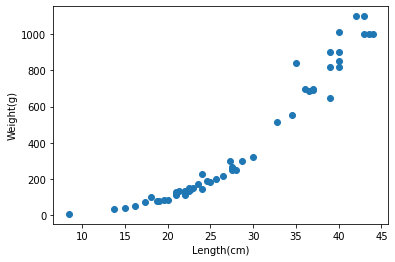

In [ ]:
# weight ~ length 산점도 그래프 
plt.scatter(perch_length, perch_weight)

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [ ]:
perch_weight.shape  #> target - 1차원 배열 

(56,)

In [ ]:
perch_length.shape
# scikit-learn 패키지에서는 데이터는 2차원 배열이어야 함 

(56,)

In [ ]:
X = perch_length[:, np.newaxis]  # 데이터(data): perch_length를 2차원 배열로 변환 
y = perch_weight.copy()          # 타겟(target): perch_weight를 복사

In [ ]:
X.shape

(56, 1)

In [ ]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [ ]:
perch_length.reshape((-1, 1))
# perch_length.reshape((56, 1))

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

# Train/Test Split

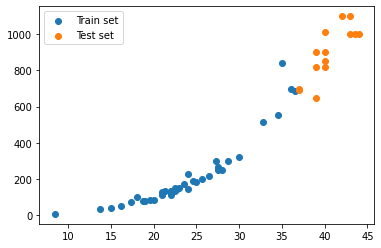

In [ ]:
# 순차적 샘플링 
X_train, X_test = X[:42], X[42:]
y_train, y_test = y[:42], y[42:]

plt.scatter(X_train, y_train, label='Train set')
plt.scatter(X_test, y_test, label='Test set')
plt.legend()
plt.show()

샘플들이 무작위로 섞여 있지 않고, length 순서로 정렬되어 있기 때문에 훈련/테스트 셋을 나눌 때 순서대로 나누는 것은 좋은 방법이 아님!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
X_train.shape, y_train.shape

((42, 1), (42,))

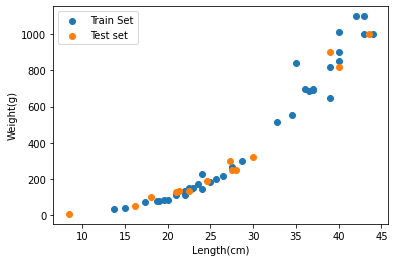

In [ ]:
plt.scatter(X_train, y_train, label='Train Set')
plt.scatter(X_test, y_test, label='Test set')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

# kNN(K_Nearest Neighbors) Regressor 학습/평가

In [ ]:
knn_reg = KNeighborsRegressor()  # 모델 생성

In [ ]:
knn_reg.fit(X_train, y_train) # 훈련 셋으로 모델 학습 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# knn_reg.fit(perch_length, perch_weight)
# 에러 발생. 2차원 발생만 가능

In [ ]:
# 훈련 셋의 예측값
train_pred = knn_reg.predict(X_train)
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [ ]:
# 훈련 셋의 타겟(실제값)
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
knn_reg.score(X_train, y_train)
#> R^2 score(coefficient of determinant, 결정계수)

0.9698823289099255

**Coefficient of determinant(결정 계수) $R^2$**

$R^2 = 1 - \dfrac{\sum{(target - prediction)^2}}{\sum{(target - mean)^2}}$

* 모델이 타겟을 정확히 예측하는 경우, `target = predict` 이므로, 분자가 0이 되기 때문에  $R^2 = 1 - 0 = 1$
* 모델이 타겟을 평균값으로만 예측하는 경우, `분자 = 분모`이므로, $R^2 = 1 -1 = 0$
* $R^2$의 최댓값은 1
* $R^2$은 음수가 될 수 있음

In [ ]:
r2_score(y_true=y_train, y_pred=train_pred)

0.9698823289099254

In [ ]:
mu = np.mean(y_train)
1 - np.sum((y_train - train_pred)**2) / np.sum((y_train - mu)**2)

0.9698823289099254

In [ ]:
# 테스트 셋 예측 
test_pred = knn_reg.predict(X_test)
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [ ]:
# 테스트 셋 타겟(실제값)
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
r2_score(y_true=y_test, y_pred=test_pred)

0.992809406101064

In [ ]:
knn_reg.score(X_test, y_test)
# reg는 predict를 가지고 있기 때문에 예측값을 계산해서 socre 반환 가능 

0.9928094061010639

In [ ]:
# MSE(Mean Squared Error): 오차들의 제곱의 평균 
mean_squared_error(y_test, test_pred)

721.7385714285714

In [ ]:
np.mean((y_test - test_pred)**2)

721.7385714285714

In [ ]:
# RMSE(Root Mean Squared Error): MSE의 sqrt
np.sqrt(mean_squared_error(y_test, test_pred))

26.865192562655704

In [ ]:
# MAE(Mean Absolute Error)
mean_absolute_error(y_test, test_pred)

19.157142857142862

In [ ]:
np.mean(np.abs((y_test - test_pred)))

19.157142857142862

Regression 모델의 성능을 평가할 때, 
* RMSE와 MAE는 0보다 크거나 같은 값. RMSE 또는 MAE는 작을 수록 좋음(0에 가까울 수록) 좋음
* 결정계수 $R^2$은 1보다 작거나 같은 값. $R^2$은 클 수록(1에 가까울 수록) 좋음  

In [ ]:
# 훈련 셋 R^2 < 테스트 셋 R^2: 과소적합 
# 훈련 셋의 RMSE < 테스트 셋 RMSE: 과소적합 
np.sqrt(mean_squared_error(y_train, train_pred))

60.96323638453089

k=3인 kNN Regressor 모델을 생성하고, 훈련 셋과 테스트 셋을 평가

In [ ]:
train_scores = []  # 훈련 셋의 R^2 점수를 저장할 리스트
test_scores = []   # 테스트 셋의 R^2 점수를 저장할 리스트
for k in (1, 3, 5, 11):
    # kNN 모델 생성
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    # kNN 모델 학습
    knn_reg.fit(X_train, y_train)
    # predict -> 실제값과 비교 -> 평가 -> 점수
    train_r2 = knn_reg.score(X_train, y_train)
    train_scores.append(train_r2)
    # 테스트 셋 평가
    test_r2 = knn_reg.score(X_test, y_test)
    test_scores.append(test_r2)

print(train_scores)
print(test_scores)

[0.9852830341215901, 0.9804899950518966, 0.9698823289099255, 0.9515761381539326]
[0.991309195814175, 0.974645996398761, 0.9928094061010639, 0.970279643030474]


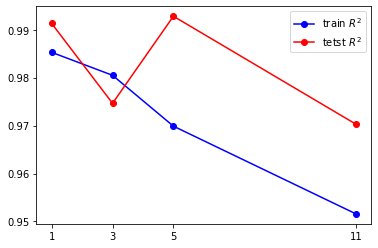

In [ ]:
ks = (1, 3, 5, 11)
plt.plot(ks, train_scores, 'bo-', label=r'train $R^2$')
plt.plot(ks, test_scores, 'ro-', label=r'tetst $R^2$')
plt.legend()
plt.xticks(ks)
plt.show()

# kNN Regressor의 문제점

In [ ]:
# 길이가 50cm 이고, 무게가 1,500g인 가상의 물고기 데이터
test_fish = np.array([[50]])  
# (1, 1) 모양으로 만든 이유는 
# scikit-learn 모델 객체의 predict() 메서드를 사용하기 위해서 2차원 배열로 만듦

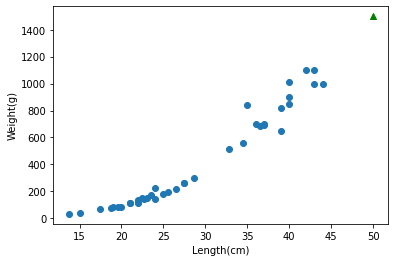

In [ ]:
# Train set 시각화
plt.scatter(X_train, y_train, label='train')

# 가상의 물고기 시각화
plt.scatter(50, 1_500, marker='^', color='green')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3)  #k=3인 kNN 모델 생성

In [ ]:
knn_reg.fit(X_train, y_train)  # 훈련 데이터로 모델 학습

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
# 가상의 물고기의 무게 예측값 
knn_reg.predict(test_fish)  #> 1,030g

array([1033.33333333])

In [ ]:
# test_fish의 최근접 이웃들 
distances, neighbor_indice = knn_reg.kneighbors(test_fish)


In [ ]:
distances

array([[6., 7., 7.]])

In [ ]:
neighbor_indice

array([[34,  8, 14]])

In [ ]:
idx = neighbor_indice[0]  # test fish와 가장 가까운 이웃 3개의 인덱스
neighbors = X_train[idx]  # fancy(list) indexing
neighbors

array([[44.],
       [43.],
       [43.]])

In [ ]:
neigh_weights = y_train[idx]
neigh_weights

array([1000., 1000., 1100.])

In [ ]:
np.mean(neigh_weights)  #> kNN regressor의 예측값

1033.3333333333333

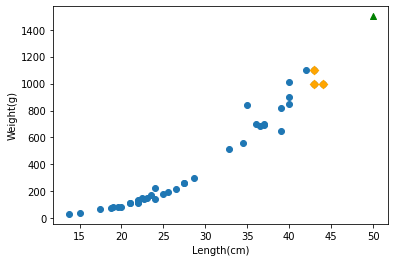

In [ ]:
# Train set 시각화
plt.scatter(X_train, y_train, label='train')

# 가상의 물고기 시각화
plt.scatter(50, 1_500, marker='^', color='green')

# 가상의 물고기와 가장 가까운 이웃 3개 시각화 
plt.scatter(neighbors, neigh_weights, marker='D', color='orange')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

# Linear Regression (선형 회귀)

In [ ]:
# Linear Regression 모델 생성
lin_reg = LinearRegression()

In [ ]:
# 모델을 훈련 셋으로 학습시킴
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 선형 회귀 모델의 학습이 끝난 후에는 선형 모델(y = w0 + w1 * x)의 절편(intercept)과 계수들(coefficient)을 찾을 수 있음
w0 = lin_reg.intercept_
w0

-709.0186449535477

In [ ]:
w1 = lin_reg.coef_
w1

# weight = -709 + 39 * length 

array([39.01714496])

In [ ]:
# 위 가상의 물고기로 모델 공식에 입력해 본다
# 길이 50cm인 가상의 물고기의 무게 예측값 -> 1,241
-709 + 39 * 50 

1241

In [ ]:
# 선형 회귀 모델 시각화 
xs = np.array([15, 50])
ys = w0 + w1 * xs

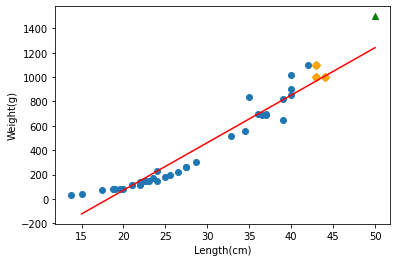

In [ ]:
# Train set 시각화
plt.scatter(X_train, y_train, label='train')
# 가상의 물고기 시각화
plt.scatter(50, 1_500, marker='^', color='green')
# 가상의 물고기와 가장 가까운 이웃 3개 시각화 
plt.scatter(neighbors, neigh_weights, marker='D', color='orange')

# 선형 회귀 직선(y = w0, w1 * x)
plt.plot(xs, ys, color='red')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

**OLS(Ordinary Least Squares) Linear Regression**

선형 회귀식($y = w_0 + w_1 \times x$)이 예측해 주는 값과 실제 타겟 값과의 차이(오차, residual)들의 제곱의 합을 최소화하는 $w_0$와 $w_1$을 찾는 과정 

In [ ]:
 # 훈련 셋의 예측값
 lin_reg.predict(X_train)

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [ ]:
# w0 + w1 * X_train # (샘플개수, 1)인 모양의 2d 배열
w0 + X_train @ w1   # (샘플개수,) 모양의 1d 배열 

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [ ]:
# 훈련 셋의 R^2 점수
lin_reg.score(X_train, y_train)

0.9398463339976039

In [ ]:
# 테스트 셋의 R^2 점수
lin_reg.score(X_test, y_test)

0.8247503123313558

# 2차 항(polynomial)을 포함한 선형 회귀 

In [ ]:
X_train.shape

(42, 1)

In [ ]:
X_train[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [ ]:
# x^2항을 추가해서 (n_samples, 2) 모양의 2d 배열 생성 
X_train_poly = np.c_[X_train, X_train**2]

In [ ]:
X_train_poly.shape

(42, 2)

In [ ]:
X_train_poly[:5]

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [ ]:
lin_reg = LinearRegression()  # 모델 생성

In [ ]:
lin_reg.fit(X_train_poly, y_train)  # 모델 학습 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

선형 모델 

$y = w_0 + w_1 \times x + w_2 \times x^2$ 

절편(intercept)과 계수들(coefficients)들을 찾음 

In [ ]:
w0 = lin_reg.intercept_
w0

116.05021078278378

In [ ]:
w = lin_reg.coef_
w

array([-21.55792498,   1.01433211])

In [ ]:
# 길이 50cm의 가상의 물고기의 무게 예측
116 - 21 * 50 + 1 * 50**2

1566

In [ ]:
# 훈련 셋의 R^2 점수 
lin_reg.score(X_train_poly, y_train)

0.9706807451768623

In [ ]:
# 테스트 셋의 R^2 점수
X_test_poly = np.c_[X_test, X_test**2]   # 테스트 셋에 X^2 항을 추가
lin_reg.score(X_test_poly, y_test)  # 2차항이 포함된 테스트 셋으로 예측(predict) 및 평가(score)

0.9775935108325122

In [ ]:
lin_reg.predict(X_test_poly)  # 테스트 셋의 예측값(무게)

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [ ]:
y_test  # 테스트 셋의 실제값(무게)

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
# predict() 메서드의 계산 과정 
w0 + X_test_poly @ w

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [ ]:
# 선형 회귀 곡선(y = w0 + w1 * x + w2 * x^2) 시각화
xs = np.arange(14, 50, 0.001)
ys = w0 + w[0] * xs + w[1] * xs**2 

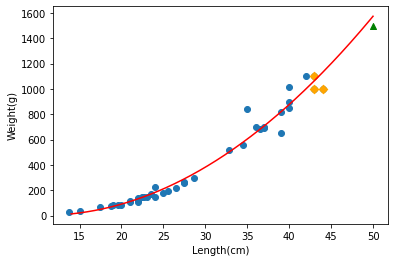

In [ ]:
# Train set 시각화
plt.scatter(X_train, y_train, label='train')
# 가상의 물고기 시각화
plt.scatter(50, 1_500, marker='^', color='green')
# 가상의 물고기와 가장 가까운 이웃 3개 시각화 
plt.scatter(neighbors, neigh_weights, marker='D', color='orange')

# 2차항 고려된 선형 회귀 곡선(y = w0 + w1 * x + w2 * x^2)
plt.plot(xs, ys, color = 'red')
# plt.plot(xs, w0 + Xs @ w, color = 'red')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

In [ ]:
Xs = np.arange(14, 50, 0.001).reshape((-1, 1)) 
Xs = np.c_[Xs, Xs**2]
w0 + Xs @ w

array([  13.04835452,   13.05519891,   13.06204532, ..., 1573.74461855,
       1573.82448877, 1573.90436101])

# PolynomialFeatures 변환기 클래스를 사용한 다차항 추가

**scikit-learn 클래스**


* Estimator(추정기) 클래스 
    * `fit`, `predict`, `score` 메서드를 가지고 있음 
    * 머신러닝 알고리즘을 구현한 클래스 
    * (예) `KNeighborsClassifier`, `KNeighborsRegressor`, `LinearRegression`
* Transformer(변환기) 클래스
    * `fit`, `fit_transform`, `fit_transform` 메서드를 가지고 있음 
    * 전처리 과정에서, (훈련 또는 테스트) 데이터를 변환하기 위한 클래스
    * (예) `StandardScaler`, `MinMaxScaler`


In [ ]:
# 변환기 클래스 객체 생성
poly_feat = PolynomialFeatures()

In [ ]:
# 변환기 클래스 fit_transform() 메서드 호출
X_train_poly = poly_feat.fit_transform(X_train)
X_train_poly[:5]
#> [[1, X, X^2], ...]
#> 맨 앞에 들어가킄 컬럼(1) ==> bias

array([[1.0000e+00, 1.9600e+01, 3.8416e+02],
       [1.0000e+00, 2.2000e+01, 4.8400e+02],
       [1.0000e+00, 1.8700e+01, 3.4969e+02],
       [1.0000e+00, 1.7400e+01, 3.0276e+02],
       [1.0000e+00, 3.6000e+01, 1.2960e+03]])

In [ ]:
poly_feat = PolynomialFeatures(include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_train_poly[:5]
#> [X, X^2] 

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [ ]:
poly_feat.get_feature_names()

['x0', 'x0^2']

In [ ]:
# 테스트 셋에 다차항 추가 
poly_feat.transform(X_test)

array([[   8.4 ,   70.56],
       [  18.  ,  324.  ],
       [  27.5 ,  756.25],
       [  21.3 ,  453.69],
       [  22.5 ,  506.25],
       [  40.  , 1600.  ],
       [  30.  ,  900.  ],
       [  24.6 ,  605.16],
       [  39.  , 1521.  ],
       [  21.  ,  441.  ],
       [  43.5 , 1892.25],
       [  16.2 ,  262.44],
       [  28.  ,  784.  ],
       [  27.3 ,  745.29]])

In [ ]:
poly_feat = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_train_poly[:5]
# fit을 안하면 데이터를 학습시키지 않았다는 의미. 데이터의 독립변수가 몇개인지 알려주지 않았다는 뜻

array([[1.960000e+01, 3.841600e+02, 7.529536e+03],
       [2.200000e+01, 4.840000e+02, 1.064800e+04],
       [1.870000e+01, 3.496900e+02, 6.539203e+03],
       [1.740000e+01, 3.027600e+02, 5.268024e+03],
       [3.600000e+01, 1.296000e+03, 4.665600e+04]])

In [ ]:
poly_feat.get_feature_names()

['x0', 'x0^2', 'x0^3']

# PolynomialFeatures + StandardScaler 

선형 회귀에서 차수(degree)가 커질 수록, 고차항이 저차항에 비해 예측값을 만들 때 영향이 더 커지게 됨 
선형 회귀에서 고차항을 포함시킬때는 일반적으로 scaling을 함게 사용함

In [ ]:
X_train.shape  #> (n_samples, n_features)

(42, 1)

In [ ]:
poly_feat = PolynomialFeatures(degree=100, include_bias=False)

In [ ]:
std_scaler = StandardScaler()

In [ ]:
lin_reg = LinearRegression()

In [ ]:
X_train_poly = poly_feat.fit_transform(X_train)  # 100차항까지 추가 

In [ ]:
X_train_poly[0]

array([1.96000000e+001, 3.84160000e+002, 7.52953600e+003, 1.47578906e+005,
       2.89254655e+006, 5.66939124e+007, 1.11120068e+009, 2.17795334e+010,
       4.26878854e+011, 8.36682554e+012, 1.63989781e+014, 3.21419970e+015,
       6.29983141e+016, 1.23476696e+018, 2.42014324e+019, 4.74348074e+020,
       9.29722225e+021, 1.82225556e+023, 3.57162090e+024, 7.00037697e+025,
       1.37207389e+027, 2.68926482e+028, 5.27095904e+029, 1.03310797e+031,
       2.02489162e+032, 3.96878758e+033, 7.77882366e+034, 1.52464944e+036,
       2.98831290e+037, 5.85709328e+038, 1.14799028e+040, 2.25006095e+041,
       4.41011947e+042, 8.64383416e+043, 1.69419150e+045, 3.32061533e+046,
       6.50840605e+047, 1.27564759e+049, 2.50026927e+050, 4.90052777e+051,
       9.60503442e+052, 1.88258675e+054, 3.68987002e+055, 7.23214525e+056,
       1.41750047e+058, 2.77830092e+059, 5.44546980e+060, 1.06731208e+062,
       2.09193168e+063, 4.10018609e+064, 8.03636473e+065, 1.57512749e+067,
       3.08724988e+068, 6

In [ ]:
# 100차항까지 포함된 훈련 셋을 표준화 적용
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [ ]:
np.mean(X_train_poly_scaled[:, 0]), np.std(X_train_poly_scaled[:, 0])

(-1.3216940769347102e-16, 0.9999999999999999)

In [ ]:
# 모든 전처리(다차항+표준화)가 끝난 데이터로 선형 회귀 모델을 학습시킴
lin_reg.fit(X_train_poly_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.coef_

array([ 2.00557630e+10, -2.58408022e+11,  1.49532847e+12, -4.90418675e+12,
        9.34291430e+12, -8.67392996e+12, -7.82611682e+11,  7.69668003e+12,
       -5.58109456e+09, -6.79558407e+12, -2.46010065e+12,  4.99817517e+12,
        5.20423172e+12, -1.63569143e+11, -5.04386991e+12, -4.58103039e+12,
       -2.92727936e+11,  3.58006339e+12,  4.82124023e+12,  2.56502444e+12,
       -1.02653972e+12, -3.84050839e+12, -4.08225740e+12, -2.38407359e+12,
        1.98148411e+11,  2.61238310e+12,  3.62406355e+12,  3.27104682e+12,
        1.54929950e+12, -4.44063972e+11, -2.07165132e+12, -3.00069992e+12,
       -3.00183843e+12, -2.13789600e+12, -6.78418491e+11,  7.14760716e+11,
        2.02103482e+12,  2.55576738e+12,  2.52470076e+12,  1.91395216e+12,
        1.04869405e+12,  8.39890755e+10, -9.16363136e+11, -1.73570552e+12,
       -2.04897502e+12, -2.09658188e+12, -1.65299115e+12, -1.16987146e+12,
       -4.25185309e+11,  2.76530253e+11,  9.12030793e+11,  1.36269923e+12,
        1.62030446e+12,  

In [ ]:
# 훈련 셋의 평가 점수(R^2)
lin_reg.score(X_train_poly_scaled, y_train)

0.9927110456541562

테스트 셋 평가

* 테스트 셋에 100차항까지 추가
* 고차항이 포함된 테스트 셋을 표준화
* 훈련된 모델의 predict() 메서드 호출해서 예측 
* 실제값과 비교(평가)


In [ ]:
X_test.shape


(14, 1)

In [ ]:
# 고차항 추가
X_test_poly = poly_feat.transform(X_test)
# 표준화
X_test_poly_scaled = std_scaler.transform(X_test_poly)
# score 계산
lin_reg.score(X_test_poly_scaled, y_test)

-5539748134.396258

In [ ]:
# 테스트 셋의 실제값(무게)
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
lin_reg.predict(X_test_poly_scaled)

array([-1.51806024e+07,  9.09695646e+01,  2.62264487e+02,  1.13381674e+02,
        1.38555502e+02,  9.21657065e+02,  5.97914877e+02,  1.86762533e+02,
        7.34993002e+02,  1.09439291e+02, -8.69132894e+07, -1.95900553e+02,
        2.74123373e+02,  2.55557455e+02])

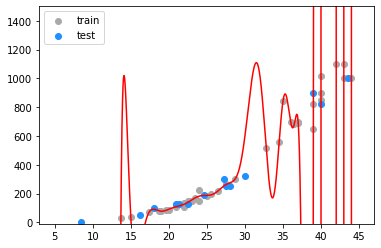

In [ ]:
# 훈련 셋 시각화 
plt.scatter(X_train, y_train, color='darkgray', label='train')
# 테스트 셋 시각화
plt.scatter(X_test, y_test, color='dodgerblue', label='test')

# 100차 선형 회귀 곡선 시각화 
Xs = np.arange(5, 45, 0.001).reshape((-1, 1))  # (n_samples, 1) 모양의 2d 배열 
Xs_poly = poly_feat.transform(Xs)   # 100차항까지 추가 
Xs_poly_scaled = std_scaler.transform(Xs_poly)  # 표준화 
ys = lin_reg.predict(Xs_poly_scaled)  # 전처리 끝난 데이터의 예측값 계산 
plt.plot(Xs, ys, color='red')

plt.legend()
plt.ylim((-10, 1500))
plt.show()
# 매우 과도하게 overfitting된 모델 

# Pipleline

In [ ]:
# Pipleline을 순서대로 연결할 변환기 또는 추정기 객체들을 생성
poly_feat = PolynomialFeatures(degree=3, include_bias=False) # polynomial 변환기
std_scaler = StandardScaler() # 표준화 변환기
lin_reg = LinearRegression()  # 선형 회귀 추정기 

In [ ]:
# Pipleline 객체 생성
pipe = Pipeline([('poly', poly_feat),
                 ('scaler', std_scaler),
                 ('reg', lin_reg)])

In [ ]:
# 훈련 셋으로 모델 학습
pipe.fit(X_train, y_train)
# poly.fit() -> scaler.fit_transform() -> reg.fit

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
# Pipeline 객체가 가지고 있는 변환기/추정기를 사용
pipe['reg'].coef_  # Pipleline의 reg 추정기의 coef_ 속성 값  

array([-790.72647622, 1861.73288208, -734.44157506])

In [ ]:
pipe['poly'].get_feature_names()

['x0', 'x0^2', 'x0^3']

In [ ]:
pipe['scaler'].mean_

array([2.84452381e+01, 8.85315000e+02, 2.97326070e+04])

In [ ]:
# 훈련 셋의 예측값
pipe.predict(X_train)
# poly.transform() -> scaler.transform() -> reg.predict()

array([  76.11208213,  121.32671907,   64.43503022,   53.03736922,
        676.51776072,  203.64006744,  883.41268054,  831.17507632,
       1039.71479927,  121.32671907,   82.25658755,  121.32671907,
        173.27607317,  290.93930643, 1039.71479927,  883.41268054,
        173.27607317,  100.09367224,  290.93930643,  883.41268054,
        519.14231311,  254.17726522,  701.95141826,   59.18009181,
        138.11611752,   50.17607368,  727.55145991,  626.2376762 ,
        338.00950138,  159.158376  ,  831.17507632,  100.09367224,
        145.77957155,  121.32671907, 1091.09141922,  133.16167938,
         67.9916215 ,  727.55145991,  121.32671907,  223.16157937,
        987.85869851,  601.43528834])

In [ ]:
# 훈련 셋의 성능 평가 점수 (R^2)
pipe.score(X_train, y_train)

0.9729178478354533

In [ ]:
# 테스트 셋의 예측값
pipe.predict(X_test)

array([ 181.88326172,   57.47493059,  290.93930643,  106.11502539,
        133.16167938,  883.41268054,  392.30695107,  191.16164463,
        831.17507632,  100.09367224, 1065.47405413,   48.55283185,
        310.17544115,  283.40118559])

In [ ]:
# 테스트 셋의 성능 평가 점수 (R^2)
pipe.score(X_test, y_test)

0.9588363727422972